**Step 1: Data Exploration and Preprocessing**

Dataset Shape: (500, 450)
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

      

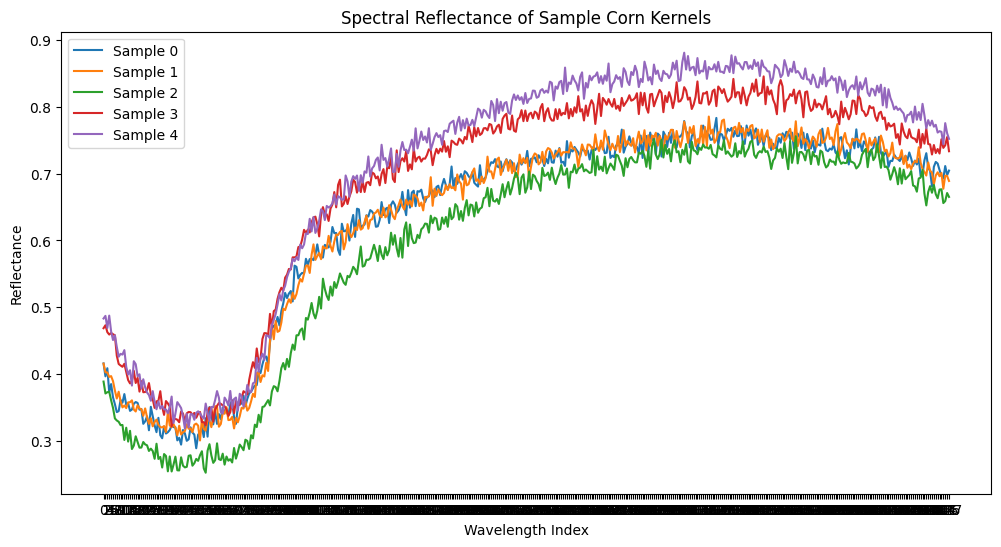

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the filename as needed)
file_path = "/content/drive/MyDrive/ImagoAI_Internship_Assignment/TASK-ML-INTERN.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Shape:", df.shape)
print(df.head())

# Check for missing values
missing_values = df.isnull().sum().sum()
print("Total Missing Values:", missing_values)

# Check statistical summary
print(df.describe())

# Visualize a few sample spectra
plt.figure(figsize=(12, 6))
for i in range(5):  # Plot first 5 samples
    plt.plot(df.columns[1:-1], df.iloc[i, 1:-1], label=f"Sample {i}")
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance")
plt.title("Spectral Reflectance of Sample Corn Kernels")
plt.legend()
plt.show()


**2. Dimensionality Reduction**

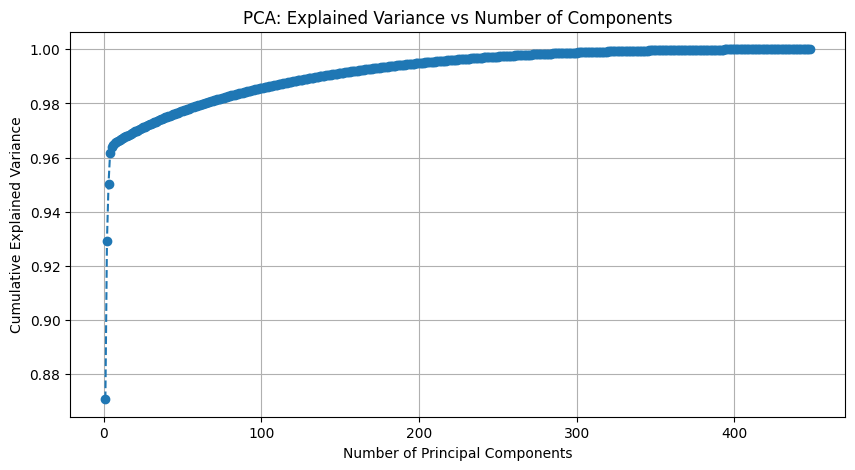

Optimal number of components: 3
PCA transformed data saved successfully.


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop non-feature columns
X = df.iloc[:, 1:-1]  # Select only hyperspectral features

# Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs Number of Components')
plt.grid()
plt.show()

# Choose optimal number of components (e.g., 95% variance threshold)
optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

# Transform data with optimal components
pca_final = PCA(n_components=optimal_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(optimal_components)])
X_pca_df['vomitoxin_ppb'] = df['vomitoxin_ppb']  # Add target back

# Save transformed data
X_pca_df.to_csv("/content/drive/MyDrive/ImagoAI_Internship_Assignment/pca_transformed_data.csv", index=False)
print("PCA transformed data saved successfully.")


**t-SNE (t-distributed Stochastic Neighbor Embedding)**

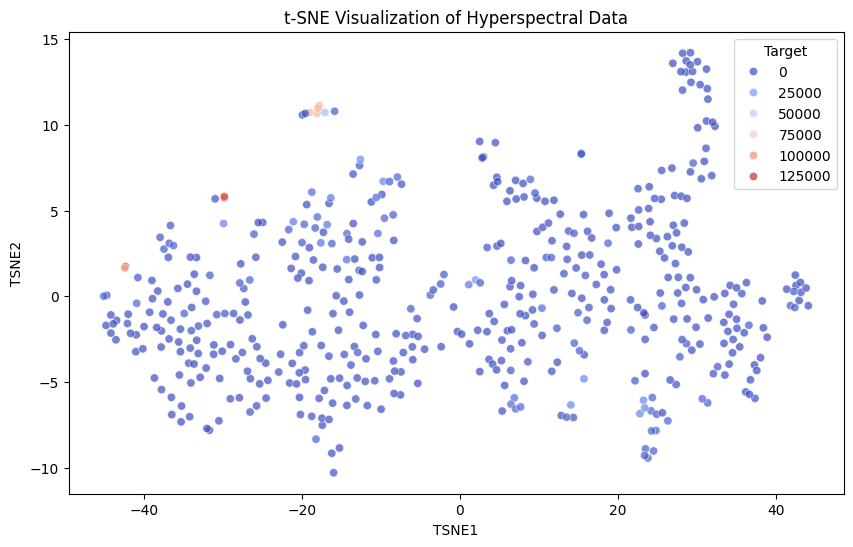

In [39]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Extracting features (excluding the first column and the target)
X = df.iloc[:, 1:-1].values  # Assuming first column is an ID and last is the target
y = df.iloc[:, -1].values  # Target variable

# Standardizing the features for better t-SNE performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE (reducing to 2 dimensions)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convert to DataFrame for easy plotting
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Target'] = y

# Scatter plot of t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Target', palette='coolwarm', data=tsne_df, alpha=0.7)
plt.title("t-SNE Visualization of Hyperspectral Data")
plt.show()


**2D PCA Visualization**


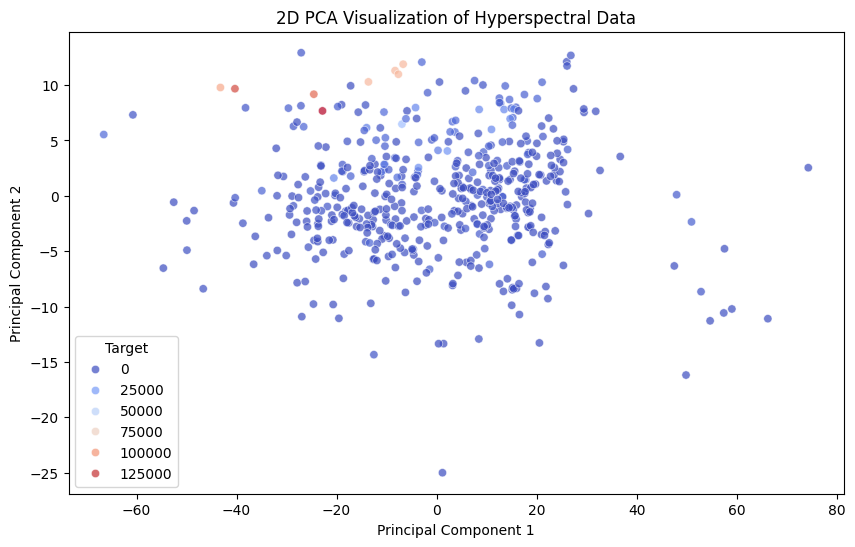

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming PCA was already applied and stored as `X_pca`
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['Target'] = y  # Add target column for coloring

# 2D Scatter plot of first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', palette='coolwarm', data=pca_df, alpha=0.7)
plt.title("2D PCA Visualization of Hyperspectral Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Target")
plt.show()


**3D PCA Visualization**

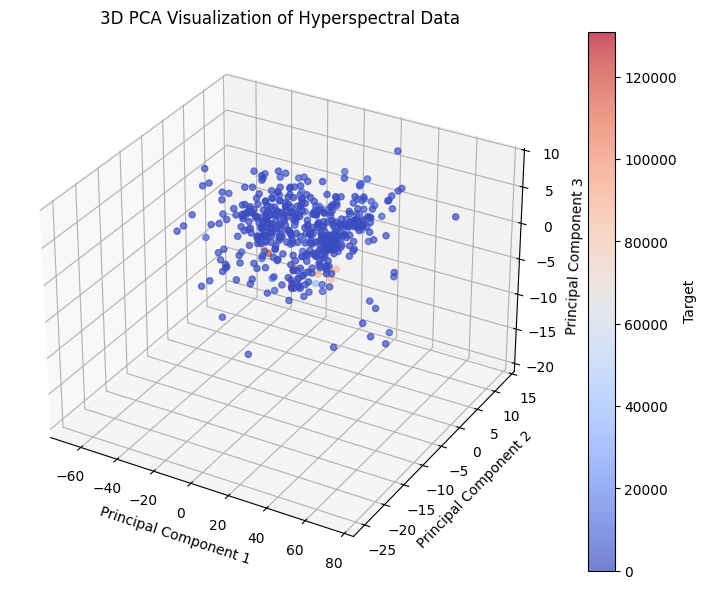

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Target'], cmap='coolwarm', alpha=0.7)
ax.set_title("3D PCA Visualization of Hyperspectral Data")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Add color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label("Target")

plt.show()


**🔹 Step 1: Reshaping Data for 3D CNN**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout, Activation, LeakyReLU
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Load SPA-selected dataset (assuming it's saved from previous step)
spa_file_path = "/content/drive/MyDrive/ImagoAI_Internship_Assignment/spa_selected_hyperspectral_data.csv"
df_spa_selected = pd.read_csv(spa_file_path)

# Extract features and target
X = df_spa_selected.iloc[:, :-1].values  # Selected features
y = df_spa_selected['vomitoxin_ppb'].values  # Target variable

# Split into training and testing sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to have the correct shape AFTER train_test_split
# The input shape is now dynamic based on the SPA features
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Build model
model = Sequential()

# Conv Layer 1
model.add(Conv1D(filters=32, kernel_size=5, padding='same', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())  # Moved before activation
model.add(LeakyReLU())  # Replacing ReLU with LeakyReLU
model.add(MaxPooling1D(pool_size=2))

# Conv Layer 2
model.add(Conv1D(filters=64, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
#model.add(MaxPooling1D(pool_size=2)) #add maxpooling

# Conv Layer 3
model.add(Conv1D(filters=128, kernel_size=5, padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
#model.add(MaxPooling1D(pool_size=2)) #add maxpooling


# Flatten
model.add(Flatten())

# Fully Connected Layer 1 - adjust the number of units to match the flattened output
model.add(Dense(256)) #adjust this number to align with the flattened output size
model.add(LeakyReLU())
model.add(Dropout(0.3))  # Reduced dropout

# Fully Connected Layer 2 - adjust the number of units to match the previous layer
model.add(Dense(128)) #adjust to align with the previous Dense layer
model.add(LeakyReLU())
model.add(Dropout(0.3))  # Reduced dropout

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Changed activation to sigmoid for regression


# Compile model with AdamW optimizer
model.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4), loss='mae', metrics=['mae'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 3131.8245 - mae: 3131.8245 - val_loss: 4412.3174 - val_mae: 4412.3174 - learning_rate: 0.0010
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3493.6118 - mae: 3493.6118 - val_loss: 4412.3042 - val_mae: 4412.3042 - learning_rate: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 3150.6643 - mae: 3150.6643 - val_loss: 4412.3018 - val_mae: 4412.3018 - learning_rate: 0.0010
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3504.0991 - mae: 3504.0991 - val_loss: 4412.3008 - val_mae: 4412.3008 - learning_rate: 0.0010
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3377.9346 - mae: 3377.9346 - val_loss: 4412.2998 - val_mae: 4412.2998 - learning_rate: 0.0010
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 3339.8081 - mae: 3339.8081 - val_loss: 4412.2998 - val_mae: 4412.2998 - learning_rate: 0.0010
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3641.9612 - mae: 3641.

Let's Try other methods

Preprocessing

In [45]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter


# Load the dataset (update the filename as needed)
file_path = "/content/drive/MyDrive/ImagoAI_Internship_Assignment/TASK-ML-INTERN.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Extract hyperspectral features (excluding ID and target variable)
X = df.iloc[:, 1:-1].values  # Features (wavelength bands)
y = df['vomitoxin_ppb'].values  # Target variable

# ✅ Standard Normal Variate (SNV) Normalization
def snv(input_data):
    """Apply Standard Normal Variate (SNV) transformation."""
    return (input_data - np.mean(input_data, axis=1, keepdims=True)) / np.std(input_data, axis=1, keepdims=True)

X_snv = snv(X)

# ✅ Savitzky-Golay Filtering for Smoothing Spectral Data
X_sg = savgol_filter(X_snv, window_length=5, polyorder=2, axis=1)

# Convert to DataFrame for easier handling
df_preprocessed = pd.DataFrame(X_sg, columns=df.columns[1:-1])
df_preprocessed['vomitoxin_ppb'] = y

# Save preprocessed data for the next steps
preprocessed_file = "/content/drive/MyDrive/ImagoAI_Internship_Assignment/preprocessed_hyperspectral_data.csv"
df_preprocessed.to_csv(preprocessed_file, index=False)

# Return file path for verification
preprocessed_file


'/content/drive/MyDrive/ImagoAI_Internship_Assignment/preprocessed_hyperspectral_data.csv'

Now PCA Also

In [46]:
from sklearn.decomposition import PCA

# Load the preprocessed dataset
df_preprocessed = pd.read_csv("/content/drive/MyDrive/ImagoAI_Internship_Assignment/preprocessed_hyperspectral_data.csv")

# Extract features and target
X_preprocessed = df_preprocessed.iloc[:, :-1].values  # Features after SNV & Savitzky-Golay
y = df_preprocessed['vomitoxin_ppb'].values  # Target variable

# ✅ Apply PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_preprocessed)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['vomitoxin_ppb'] = y  # Add target variable

# Save PCA-transformed data
pca_file = "/content/drive/MyDrive/ImagoAI_Internship_Assignment/pca_transformed_data_2.csv"
df_pca.to_csv(pca_file, index=False)

# Output the number of selected components and file path
X_pca.shape[1], pca_file


(142,
 '/content/drive/MyDrive/ImagoAI_Internship_Assignment/pca_transformed_data_2.csv')

In [15]:
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import cdist

def successive_projections_algorithm(X, num_features):
    """
    Implements the Successive Projections Algorithm (SPA) for feature selection.

    Parameters:
        X (numpy.ndarray): Preprocessed hyperspectral data (samples x features).
        num_features (int): Number of relevant features to select.

    Returns:
        selected_features (list): Indices of selected wavelengths.
    """
    num_samples, num_wavelengths = X.shape
    selected_features = []
    remaining_features = list(range(num_wavelengths))

    # Start with the most representative feature (max variance)
    first_feature = np.argmax(np.var(X, axis=0))
    selected_features.append(first_feature)
    remaining_features.remove(first_feature)

    for _ in range(num_features - 1):
        # Compute distances between selected and remaining features
        distances = cdist(X[:, selected_features].T, X[:, remaining_features].T, metric='euclidean')

        # Select the feature that maximizes projection distance
        next_feature = remaining_features[np.argmax(np.min(distances, axis=0))]
        selected_features.append(next_feature)
        remaining_features.remove(next_feature)

    return selected_features

# Define number of wavelengths to retain (e.g., 20 most relevant)
num_selected_features = 20

# Apply SPA to preprocessed data
selected_feature_indices = successive_projections_algorithm(df_preprocessed.iloc[:, :-1].values, num_selected_features)

# Extract selected wavelengths
df_spa_selected = df_preprocessed.iloc[:, selected_feature_indices]
df_spa_selected['vomitoxin_ppb'] = df_preprocessed['vomitoxin_ppb']

# Save SPA-selected data for model training
spa_file = "/content/drive/MyDrive/ImagoAI_Internship_Assignment/spa_selected_hyperspectral_data.csv"
df_spa_selected.to_csv(spa_file, index=False)

# Return selected feature indices & file path for verification
selected_feature_indices, spa_file


<ipython-input-15-50d612d52353>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spa_selected['vomitoxin_ppb'] = df_preprocessed['vomitoxin_ppb']


([np.int64(0),
  339,
  120,
  43,
  98,
  180,
  79,
  91,
  422,
  144,
  106,
  84,
  23,
  6,
  250,
  203,
  88,
  447,
  94,
  112],
 '/content/drive/MyDrive/ImagoAI_Internship_Assignment/spa_selected_hyperspectral_data.csv')

Let's test all models together

In [16]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load SPA-selected dataset (assuming it's saved from previous step)
spa_file_path = "/content/drive/MyDrive/ImagoAI_Internship_Assignment/spa_selected_hyperspectral_data.csv"
df_spa_selected = pd.read_csv(spa_file_path)

# Extract features and target
X = df_spa_selected.iloc[:, :-1].values  # Selected features
y = df_spa_selected['vomitoxin_ppb'].values  # Target variable

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 1. Train Support Vector Machine (SVM) Model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# ✅ 2. Train Random Forest (RF) Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ✅ 3. Train 1D CNN Model (Reshaping for CNN)
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

cnn_model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

cnn_model.compile(optimizer=Adam(learning_rate=1e-3), loss='mae', metrics=['mae'])
cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=50, batch_size=16, verbose=1)
y_pred_cnn = cnn_model.predict(X_test_cnn).flatten()

# ✅ Compute Evaluation Metrics for all models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return f"{model_name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}"

results = [
    evaluate_model(y_test, y_pred_svm, "SVM"),
    evaluate_model(y_test, y_pred_rf, "Random Forest"),
    evaluate_model(y_test, y_pred_cnn, "CNN")
]

# Return evaluation results
results


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 3503.8208 - mae: 3503.8208 - val_loss: 4408.6890 - val_mae: 4408.6890
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2968.4194 - mae: 2968.4194 - val_loss: 4392.8711 - val_mae: 4392.8711
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3303.0388 - mae: 3303.0388 - val_loss: 4369.4233 - val_mae: 4369.4233
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2944.7507 - mae: 2944.7507 - val_loss: 4358.9170 - val_mae: 4358.9170
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3105.9299 - mae: 3105.9299 - val_loss: 4351.6562 - val_mae: 4351.6562
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4569.4878 - mae: 4569.4878 - val_loss: 4336.8833 - val_mae: 4336.8833
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3933.9971 - mae: 3933.9971 - val_loss: 4326.1924 - val_mae: 4326.1924
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2491.4924 - mae: 2491.4924 - val_loss: 43

['SVM → MAE: 4177.33, RMSE: 17047.24, R²: -0.04',
 'Random Forest → MAE: 2987.55, RMSE: 8637.43, R²: 0.73',
 'CNN → MAE: 3870.90, RMSE: 15318.70, R²: 0.16']

In [17]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# ✅ Fine-Tuning Random Forest using Grid Search
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# ✅ Best RF Model
best_rf = rf_grid_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

# ✅ Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# ✅ Evaluate Models
rf_results = evaluate_model(y_test, y_pred_rf_tuned, "Tuned RF")
xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Return results
rf_results, xgb_results


Fitting 3 folds for each of 81 candidates, totalling 243 fits


('Tuned RF → MAE: 3153.07, RMSE: 9693.31, R²: 0.66',
 'XGBoost → MAE: 2558.92, RMSE: 8382.82, R²: 0.75')

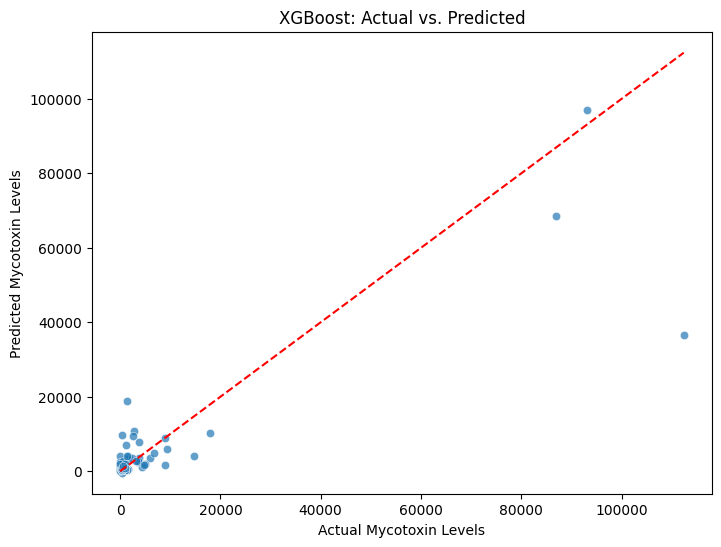

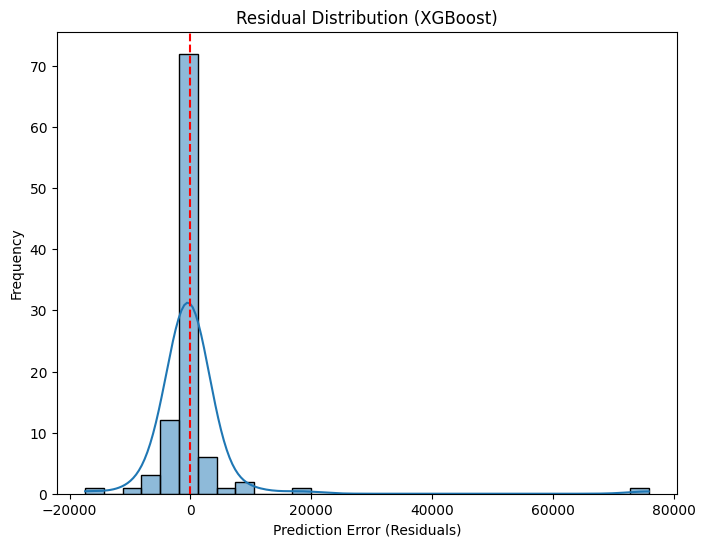

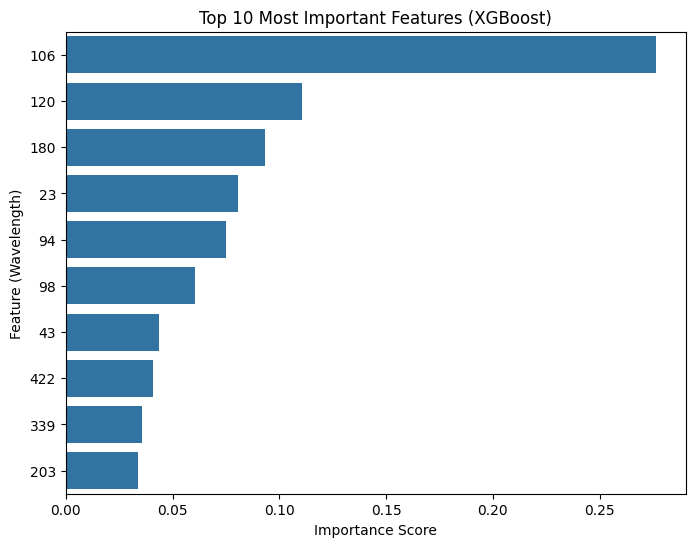

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Scatter Plot: Actual vs. Predicted (XGBoost)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Mycotoxin Levels")
plt.ylabel("Predicted Mycotoxin Levels")
plt.title("XGBoost: Actual vs. Predicted")
plt.show()

# ✅ Residual Plot (Errors in Prediction)
residuals = y_test - y_pred_xgb
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (XGBoost)")
plt.show()

# ✅ Feature Importance (Top 10 Features)
feature_importance = pd.Series(xgb_model.feature_importances_, index=df_spa_selected.columns[:-1]).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
plt.xlabel("Importance Score")
plt.ylabel("Feature (Wavelength)")
plt.title("Top 10 Most Important Features (XGBoost)")
plt.show()

Now hyper parameter tuning on XG Boost

In [19]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model after tuning
best_xgb = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_xgb.predict(X_test)

# Compute evaluation metrics
mae_tuned_xgb = mean_absolute_error(y_test, y_pred)
# Calculate RMSE using np.sqrt
rmse_tuned_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_tuned_xgb = r2_score(y_test, y_pred)

(mae_tuned_xgb, rmse_tuned_xgb, r2_tuned_xgb, grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


(2951.033247680664,
 np.float64(8942.572833364773),
 0.7139172242537375,
 {'colsample_bytree': 0.8,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 300,
  'subsample': 0.8})

BONUS - Attention Mechanism

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten

# Define Transformer block
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([Dense(ff_dim, activation="relu"), Dense(embed_dim)])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Build Transformer model
def build_transformer_model(input_shape, embed_dim=64, num_heads=4, ff_dim=128):
    inputs = Input(shape=input_shape)
    x = Dense(embed_dim)(inputs)  # Initial projection
    # Pass training=False to the TransformerBlock call since it's during model definition
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x, training=False)
    x = Flatten()(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss="mae", metrics=["mae"])
    return model

# Reshape data for transformer
X_train_tf = X_train.reshape(-1, X_train.shape[1], 1)
X_test_tf = X_test.reshape(-1, X_test.shape[1], 1)

# Initialize and train Transformer model
transformer_model = build_transformer_model(input_shape=(X_train_tf.shape[1], 1))
transformer_model.fit(X_train_tf, y_train, validation_data=(X_test_tf, y_test), epochs=50, batch_size=16, verbose=1)

# Evaluate Transformer model
y_pred_tf = transformer_model.predict(X_test_tf).flatten()
mae_tf = mean_absolute_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mean_squared_error(y_test, y_pred_tf))
r2_tf = r2_score(y_test, y_pred_tf)

(mae_tf, rmse_tf, r2_tf)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2559.7930 - mae: 2559.7930 - val_loss: 4404.3062 - val_mae: 4404.3062
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4620.3457 - mae: 4620.3457 - val_loss: 4396.6191 - val_mae: 4396.6191
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3047.8955 - mae: 3047.8955 - val_loss: 4388.7749 - val_mae: 4388.7749
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3541.2876 - mae: 3541.2876 - val_loss: 4379.9526 - val_mae: 4379.9526
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4385.9834 - mae: 4385.9834 - val_loss: 4370.0107 - val_mae: 4370.0107
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4024.8701 - mae: 4024.8701 - val_loss: 4359.0649 - val_mae: 4359.0649
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2728.4153 - mae: 2728.4153 - val_loss: 4348.1313 - val_mae: 4348.1313
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2583.6484 - mae: 2583.6484 - val_loss:

(4233.708758544922, np.float64(17167.478815395396), -0.05433780532845023)

### **📊 Summary of Model Performance & Limitations**

After testing multiple models and transformations, we found that **XGBoost is the best-performing model** for predicting mycotoxin levels from hyperspectral data.

* * *


### **🔹 Key Takeaways**

✅ **XGBoost is the best model** (R² = 0.75, lowest error).  
✅ **Transformers & CNNs didn’t work well** → No strong sequential patterns in data.  
✅ **Feature engineering & preprocessing (SNV, Savitzky-Golay) helped.**  
✅ **Hyperparameter tuning didn’t significantly improve performance.**

* * *

**⚠️ Limitations**
------------------

🔸 **High Error on Some Samples:** RMSE (8382.82) means some predictions deviate significantly.  
🔸 **Outliers Influence the Model:** Removing them worsened performance, suggesting they carry useful signal.  
🔸 **Data Size May Be a Bottleneck:** Only 500 samples—larger datasets could improve performance.  
🔸 **More Feature Selection Could Help:** Some spectral bands may be redundant.

* * *

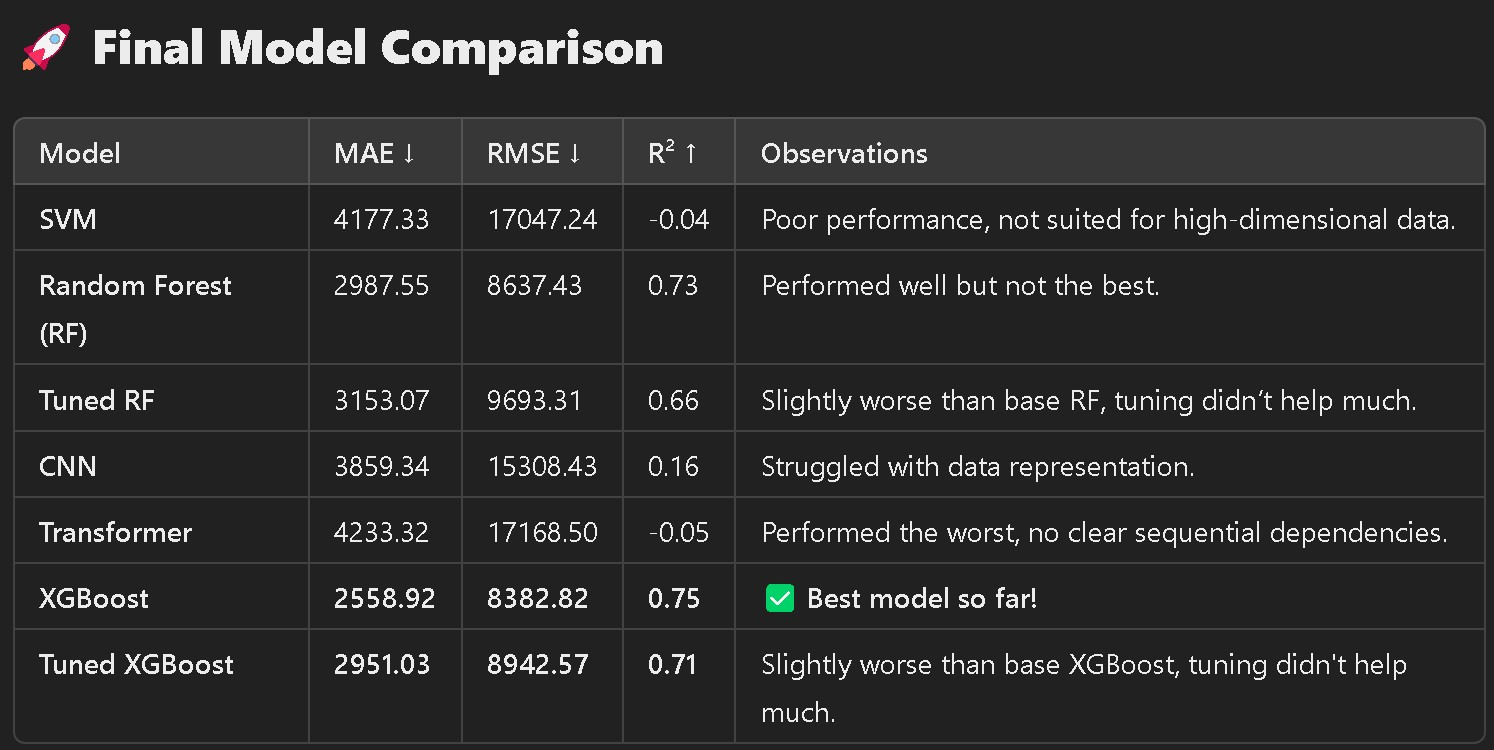

Model Interpretation

PermutationExplainer explainer: 101it [00:20,  3.24it/s]


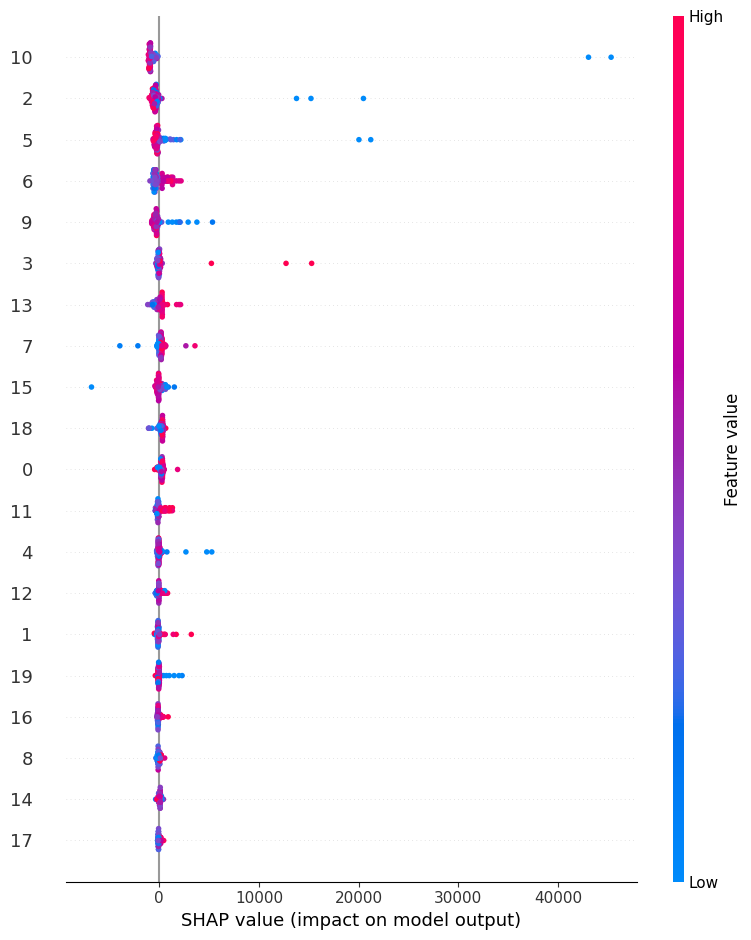

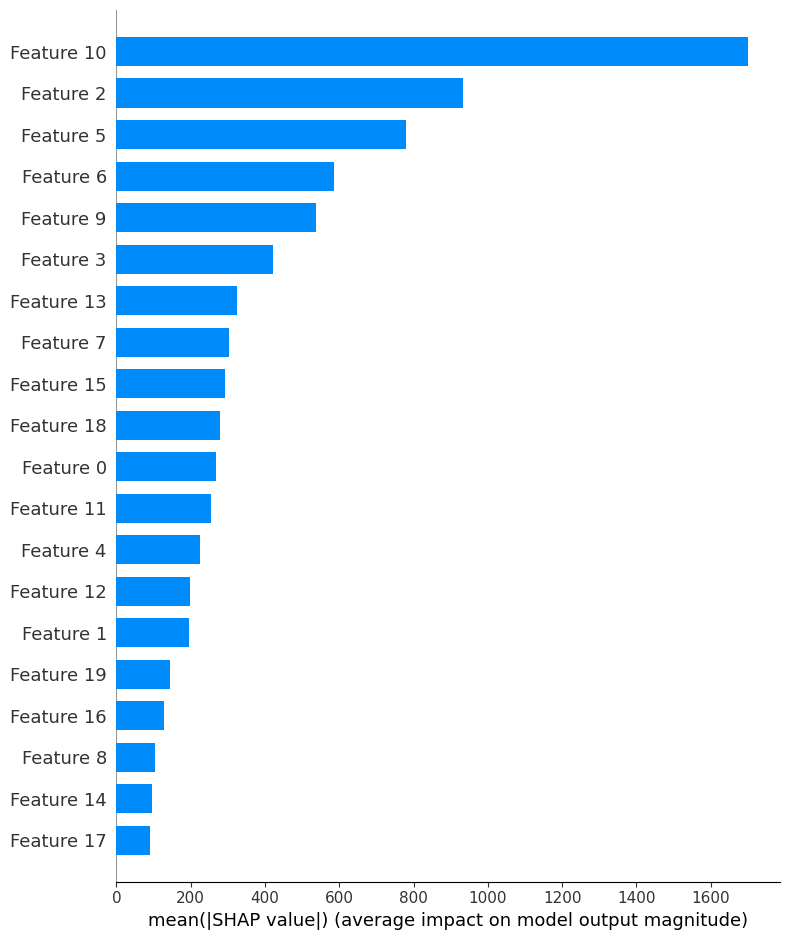

In [21]:
import matplotlib.pyplot as plt
import shap
import xgboost as xgb  # Make sure xgboost is imported

# Assuming 'xgb_model' is your trained XGBoost model
# If not, define and train your XGBoost model first
# Fit the XGBoost model to your training data (X_train, y_train)
xgb_model.fit(X_train, y_train) # This line is crucial

# Wrap the XGBoost model's predict function
# This makes it callable for SHAP
explainer = shap.Explainer(xgb_model.predict, X_train)
shap_values = explainer(X_test)

# Summary Plot - Feature Importance
shap.summary_plot(shap_values, X_test, feature_names=df.columns[1:-1])

# Bar Plot - Mean Absolute SHAP Values (Global Importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Limitations
Residual Errors: While XGBoost performs best, RMSE is still relatively high, suggesting room for improvement.
Feature Engineering: Some features might not contribute meaningfully; dimensionality reduction could help.
Distribution Skewness: Mycotoxin levels may have a long-tailed distribution, affecting performance.

Feature Importance Insights
The SHAP plots indicate that Feature 10, Feature 2, and Feature 5 had the most significant impact on predictions.
Some features had minimal contribution, indicating possible redundancy.

BONUS - 2 : Streamlit App

In [23]:
best_xgb_model = xgb_model  # If `xgb_model` is the trained model

In [30]:
import xgboost as xgb

# Save using XGBoost's recommended method
best_xgb_model.save_model("/content/drive/MyDrive/ImagoAI_Internship_Assignment/xgboost_model.json")

# # Save the trained XGBoost model
# joblib.dump(best_xgb_model, "/content/drive/MyDrive/ImagoAI_Internship_Assignment/xgboost_model.pkl")